In [ ]:
# Impoting all the necessary libraries
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LassoCV

**Data Pre-Processing Steps**

In [ ]:
dataset= pd.read_csv('/content/2510364_USA.csv')

In [ ]:
dataset.drop('PGTM', inplace=True, axis=1)

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

TAVG    0
TMAX    0
TMIN    0
AWND    0
WDF2    0
WDF5    0
WSF2    0
WSF5    0
PRCP    0
dtype: int64

In [ ]:
dataset.shape

(2185, 9)

In [ ]:
rain= dataset.loc[(dataset['PRCP'] > 0)]
no_rain= dataset.loc[(dataset['PRCP'] == 0)]

In [ ]:
rain['PRCP'] =rain['PRCP']/rain['PRCP']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
concat= [rain, no_rain]
new_dataset = pd.concat(concat)
dataset=new_dataset.sample(frac=1).reset_index(drop=True)
dataset['PRCP'] = dataset['PRCP'].apply(np.int64)

In [ ]:
dataset.head(10)

,TAVG,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,PRCP
0,32,37,27,6.71,30,130.0,15.0,19.0,1
1,37,41,30,8.50,360,360.0,18.1,21.9,1
2,26,40,9,4.70,360,360.0,18.1,25.1,0
3,27,28,25,2.91,340,350.0,8.9,13.0,0
4,68,84,52,5.37,270,330.0,16.1,25.1,0
5,17,23,6,6.04,290,290.0,15.0,27.1,1
6,31,33,29,5.82,70,70.0,14.1,17.0,1
7,25,31,20,12.30,330,340.0,28.0,38.9,0
8,54,65,40,7.38,350,20.0,14.1,21.0,0
9,58,71,47,4.25,140,130.0,16.1,19.9,1


In [ ]:
dataset= dataset[['TAVG', 'TMAX', 'TMIN','AWND', 'WDF2', 'WDF5','WSF2', 'WSF5', 'PRCP']]

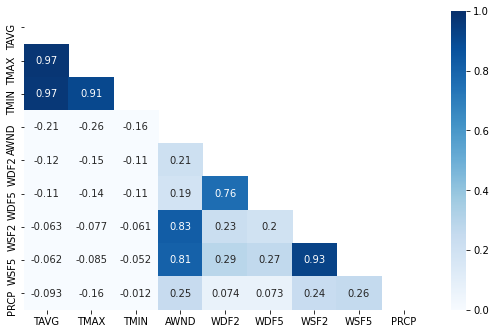

In [ ]:
plt.figure(figsize=(9, 5.5))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))
heatmap = sn.heatmap(dataset.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='Blues')

In [ ]:
features= dataset[['TAVG', 'TMAX', 'TMIN', 'AWND', 'WDF2', 'WDF5','WSF2', 'WSF5']]
labels= dataset[['PRCP']]

In [ ]:
reg = LassoCV()
reg.fit(features, labels.values.ravel())
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(features,labels.values.ravel()))
coef = pd.Series(reg.coef_, index = features.columns)

Best alpha using built-in LassoCV: 0.003762
Best score using built-in LassoCV: 0.181906


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 0 variables


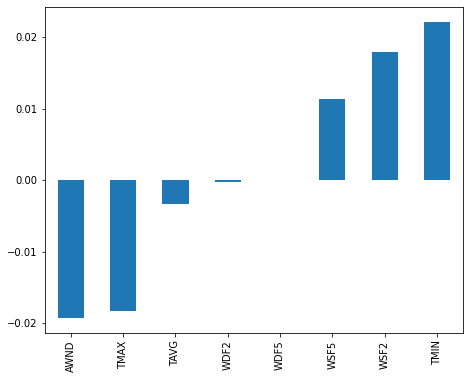

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7.5, 6.0)
imp_coef.plot(kind = "bar")